<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/EDA_on_progress_logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#these codes analyse the descriptive statistics of italian, german and korean progress datasets
#they also show date analysis

In [16]:
import pandas as pd

# Load the CSV file
file_path = '/content/deu_full_progress_data.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Calculate descriptive statistics for numeric columns
numeric_columns = ['Studied', 'Correct answers', 'Incorrect answers']
descriptive_stats = data[numeric_columns].describe().T

# Display the statistics
print(descriptive_stats)

# Save the results to a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv')


                   count       mean       std  min   25%   50%   75%   max
Studied             36.0  11.861111  3.473597  6.0  10.0  11.5  16.0  17.0
Correct answers     36.0  11.333333  3.656696  6.0   9.0  11.0  15.0  17.0
Incorrect answers   36.0   0.527778  0.696362  0.0   0.0   0.0   1.0   3.0


In [17]:
import pandas as pd

# Load the CSV file
file_path = '/content/progress_log_kr_cleaned (1).csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Calculate descriptive statistics for numeric columns
numeric_columns = ['Studied', 'Correct answers', 'Incorrect answers']
descriptive_stats = data[numeric_columns].describe().T

# Display the statistics
print(descriptive_stats)

# Save the results to a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv')

                   count      mean       std  min  25%  50%    75%   max
Studied            132.0  5.643939  5.717434  0.0  1.0  3.0   9.25  18.0
Correct answers    106.0  6.566038  5.753705  0.0  2.0  3.0  11.75  18.0
Incorrect answers  106.0  0.462264  0.794919  0.0  0.0  0.0   1.00   4.0


In [12]:
import pandas as pd

# Load the CSV file
file_path = '/content/merged_ita_data.csv'
data = pd.read_csv(file_path)

# Convert numeric columns into proper numerical values (coerce errors to NaN)
data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')

# Calculate descriptive statistics for numeric columns
numeric_columns = ['Studied', 'Correct answers', 'Incorrect answers']
descriptive_stats = data[numeric_columns].describe().T

# Display descriptive statistics
print(descriptive_stats)

# Save cleaned data and descriptive statistics to new CSV files
#ata.to_csv('/mnt/data/cleaned_progress_log.csv', index=False)
#descriptive_stats.to_csv('/mnt/data/descriptive_statistics.csv')


                    count      mean       std  min  25%  50%   75%   max
Studied            1480.0  5.375676  4.430908  0.0  2.0  4.0   9.0  20.0
Correct answers    1371.0  5.045222  4.256485  0.0  1.0  3.0  10.0  20.0
Incorrect answers  1371.0  0.757841  1.031477  0.0  0.0  0.0   1.0   6.0


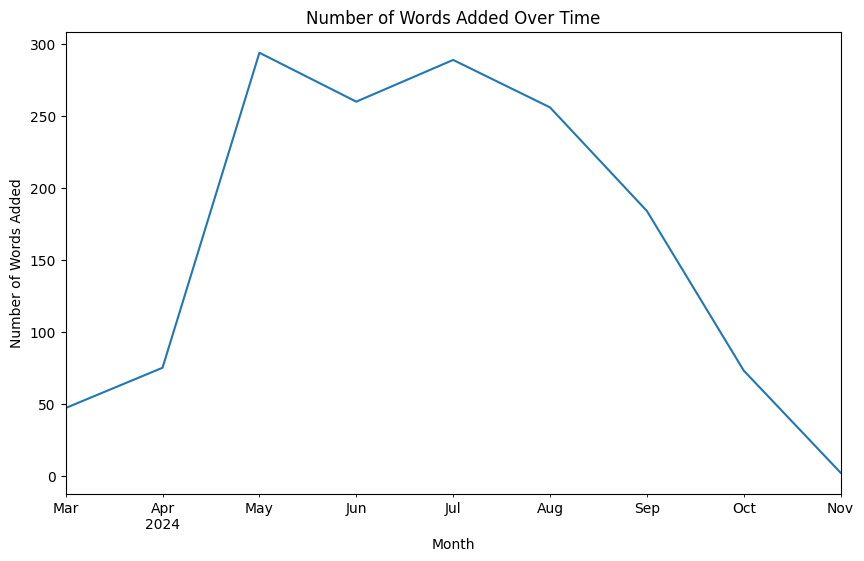

Average Time Gap Between Additions: 0.17038539553752535 days


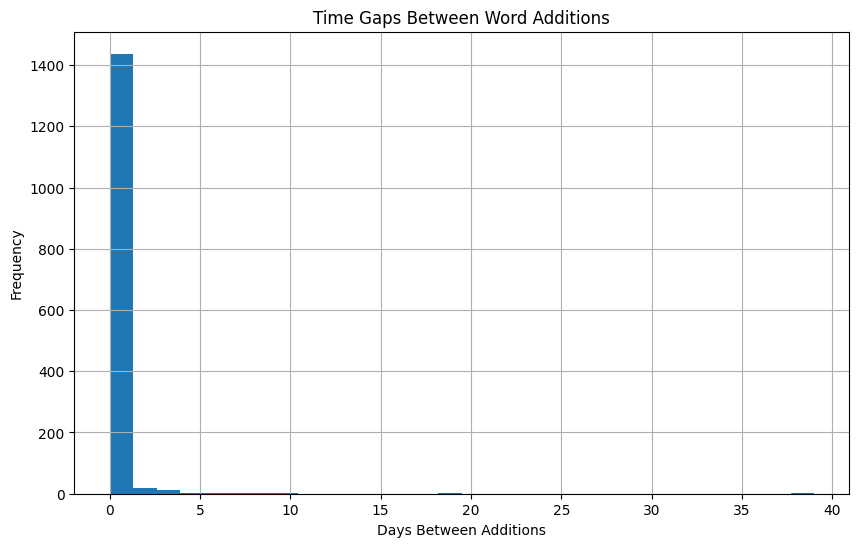

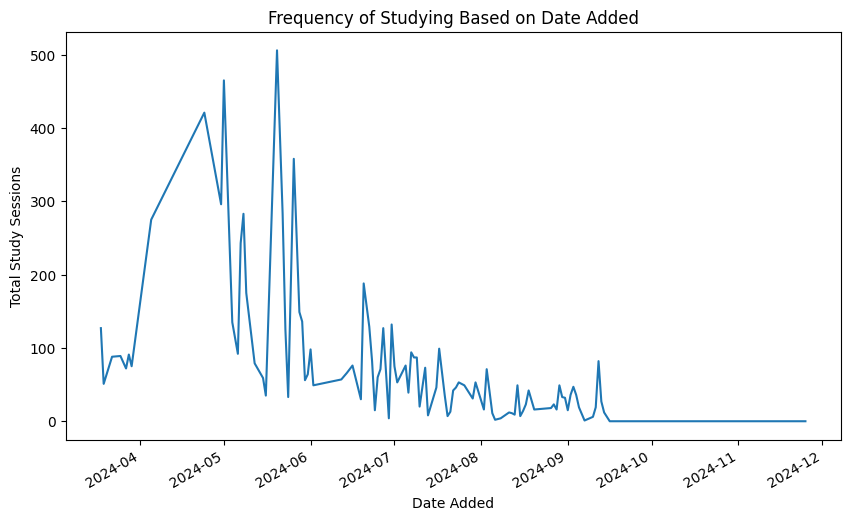

In [15]:
import pandas as pd      #italian
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/merged_ita_data.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Convert the 'Card was added' column to datetime format (DD/MM/YY)
data['Card was added'] = pd.to_datetime(data['Card was added'], format='%d/%m/%y', errors='coerce')

# 1. Number of words added over time (trend analysis)
words_added_over_time = data.groupby(data['Card was added'].dt.to_period('M')).size()

# Plotting words added over time
plt.figure(figsize=(10, 6))
words_added_over_time.plot(kind='line')
plt.title('Number of Words Added Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Words Added')
plt.show()

# 2. Time gaps between word additions
data_sorted = data.sort_values('Card was added')
data_sorted['time_diff'] = data_sorted['Card was added'].diff().dt.days

# Display average time gap and histogram of gaps
average_gap = data_sorted['time_diff'].mean()
print(f"Average Time Gap Between Additions: {average_gap} days")

# Histogram of time gaps
plt.figure(figsize=(10, 6))
data_sorted['time_diff'].hist(bins=30)
plt.title('Time Gaps Between Word Additions')
plt.xlabel('Days Between Additions')
plt.ylabel('Frequency')
plt.show()

# 3. Frequency of studying based on the date added
studying_frequency = data.groupby('Card was added')['Studied'].sum()

# Plotting studying frequency over time
plt.figure(figsize=(10, 6))
studying_frequency.plot(kind='line')
plt.title('Frequency of Studying Based on Date Added')
plt.xlabel('Date Added')
plt.ylabel('Total Study Sessions')
plt.show()


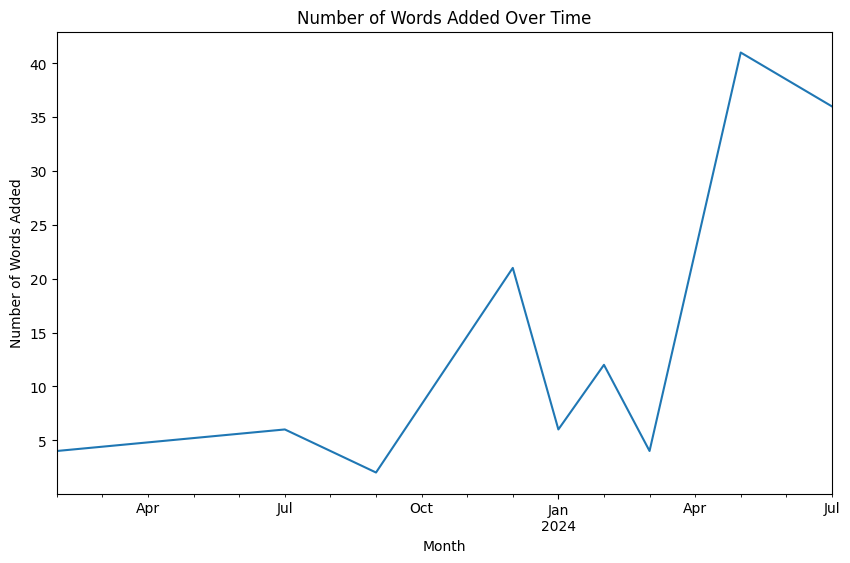

Average Time Gap Between Additions: 4.0458015267175576 days


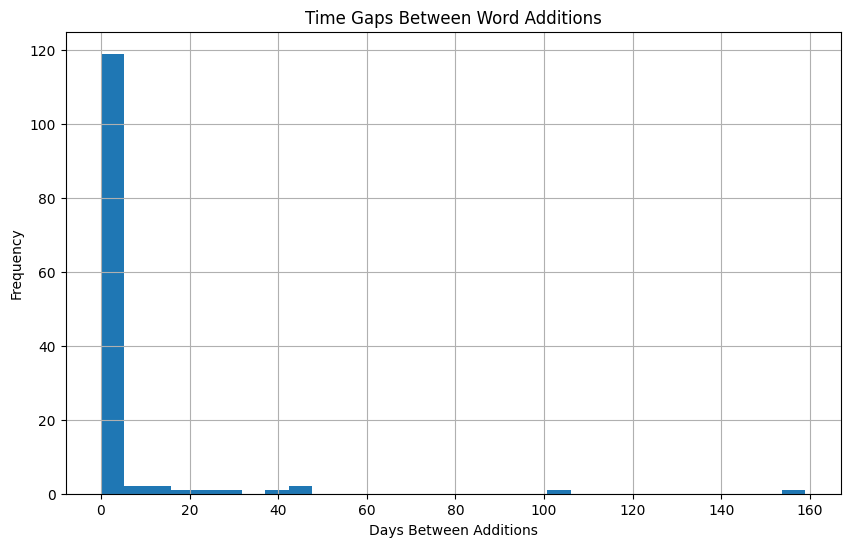

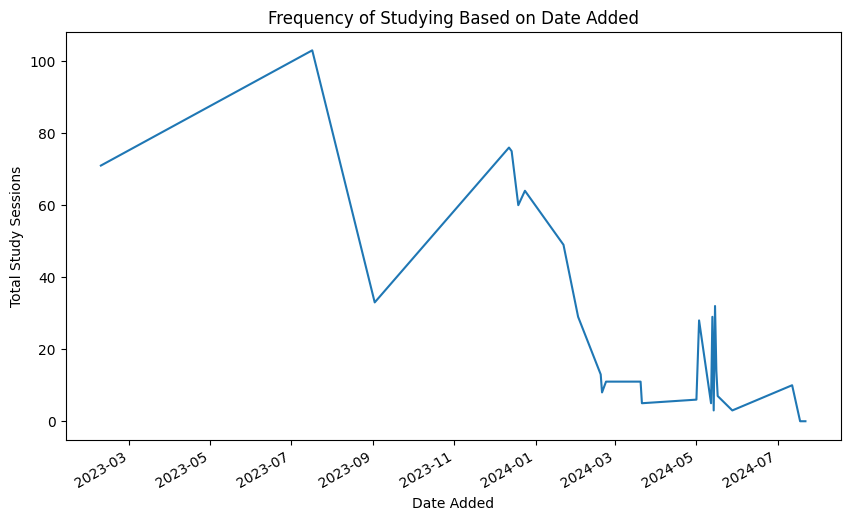

In [19]:
import pandas as pd      #korean
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/progress_log_kr_cleaned (1).csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Convert the 'Card was added' column to datetime format (DD/MM/YY)
data['Card was added'] = pd.to_datetime(data['Card was added'], format='%d/%m/%y', errors='coerce')

# 1. Number of words added over time (trend analysis)
words_added_over_time = data.groupby(data['Card was added'].dt.to_period('M')).size()

# Plotting words added over time
plt.figure(figsize=(10, 6))
words_added_over_time.plot(kind='line')
plt.title('Number of Words Added Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Words Added')
plt.show()

# 2. Time gaps between word additions
data_sorted = data.sort_values('Card was added')
data_sorted['time_diff'] = data_sorted['Card was added'].diff().dt.days

# Display average time gap and histogram of gaps
average_gap = data_sorted['time_diff'].mean()
print(f"Average Time Gap Between Additions: {average_gap} days")

# Histogram of time gaps
plt.figure(figsize=(10, 6))
data_sorted['time_diff'].hist(bins=30)
plt.title('Time Gaps Between Word Additions')
plt.xlabel('Days Between Additions')
plt.ylabel('Frequency')
plt.show()

# 3. Frequency of studying based on the date added
studying_frequency = data.groupby('Card was added')['Studied'].sum()

# Plotting studying frequency over time
plt.figure(figsize=(10, 6))
studying_frequency.plot(kind='line')
plt.title('Frequency of Studying Based on Date Added')
plt.xlabel('Date Added')
plt.ylabel('Total Study Sessions')
plt.show()


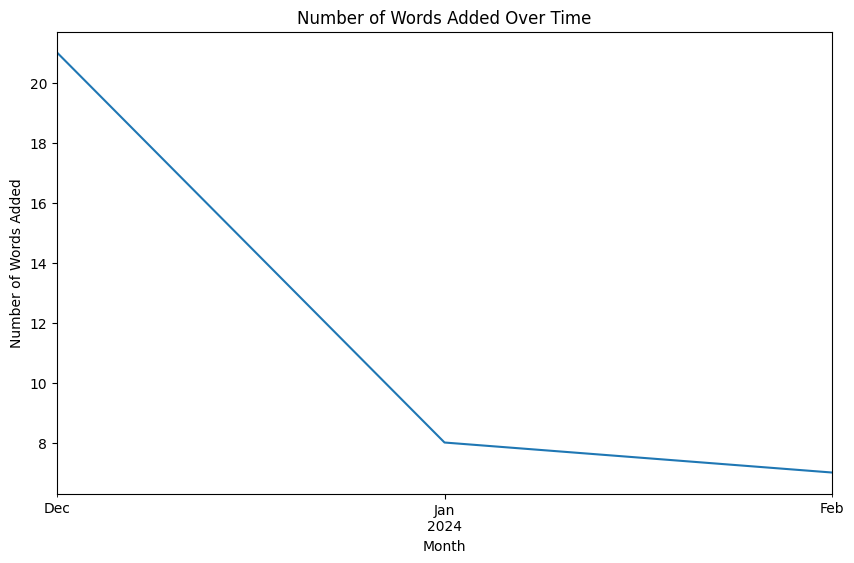

Average Time Gap Between Additions: 2.0 days


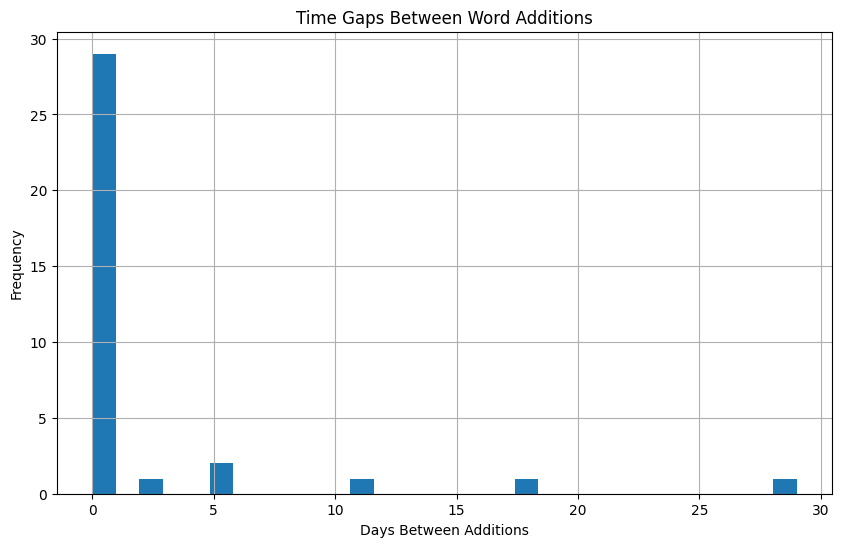

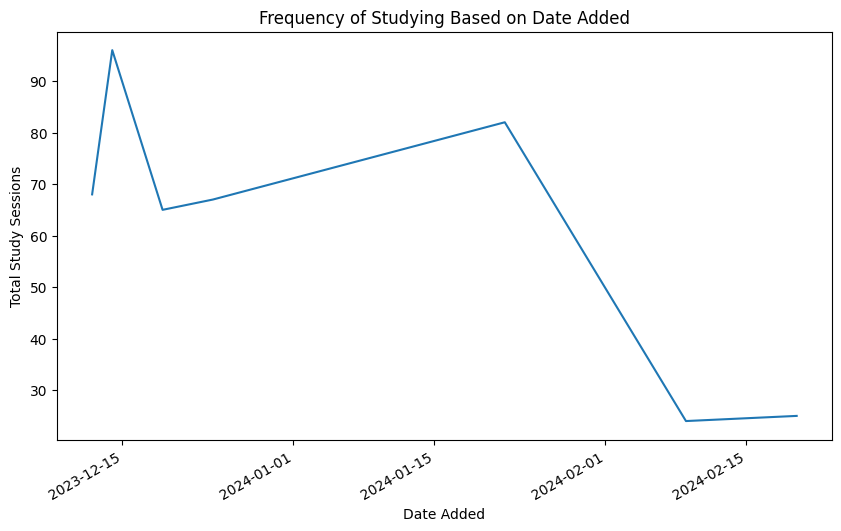

In [20]:
import pandas as pd      #german
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/deu_full_progress_data.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Convert the 'Card was added' column to datetime format (DD/MM/YY)
data['Card was added'] = pd.to_datetime(data['Card was added'], format='%d/%m/%y', errors='coerce')

# 1. Number of words added over time (trend analysis)
words_added_over_time = data.groupby(data['Card was added'].dt.to_period('M')).size()

# Plotting words added over time
plt.figure(figsize=(10, 6))
words_added_over_time.plot(kind='line')
plt.title('Number of Words Added Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Words Added')
plt.show()

# 2. Time gaps between word additions
data_sorted = data.sort_values('Card was added')
data_sorted['time_diff'] = data_sorted['Card was added'].diff().dt.days

# Display average time gap and histogram of gaps
average_gap = data_sorted['time_diff'].mean()
print(f"Average Time Gap Between Additions: {average_gap} days")

# Histogram of time gaps
plt.figure(figsize=(10, 6))
data_sorted['time_diff'].hist(bins=30)
plt.title('Time Gaps Between Word Additions')
plt.xlabel('Days Between Additions')
plt.ylabel('Frequency')
plt.show()

# 3. Frequency of studying based on the date added
studying_frequency = data.groupby('Card was added')['Studied'].sum()

# Plotting studying frequency over time
plt.figure(figsize=(10, 6))
studying_frequency.plot(kind='line')
plt.title('Frequency of Studying Based on Date Added')
plt.xlabel('Date Added')
plt.ylabel('Total Study Sessions')
plt.show()
